# Merge with Capacity Table

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("data_vol.csv")
df = df[df.geo_hash.notnull()]
df.head()

,Unnamed: 0,Geohash,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Latitude,Longitude,AvgTimeToPark,AvgTimeToParkRatio,...,PercentOther,District,food_count,shop_count,lat,lng,geo_hash,record_date,8hr_Vehicle_Vol,8hr_Pedestrian_Vol
3,3,dpz80zn,43.63220,-79.41193,43.63358,-79.41055,43.63283,-79.41134,8.8033,2.0734,...,0.0000,Old Toronto,2,0,43.632436,-79.410960,dpz80zn,2010-12-14,22009.0,120.0
13,13,dpz80z5,43.63220,-79.41605,43.63358,-79.41467,43.63278,-79.41553,6.0000,1.3346,...,0.0833,Old Toronto,0,0,43.633270,-79.415280,dpz80z5,2008-10-14,1485.0,33.0
22,22,dpz8930,43.68713,-79.39819,43.68851,-79.39682,43.68763,-79.39786,3.9167,1.7422,...,0.0000,Old Toronto,6,4,43.687300,-79.398000,dpz8930,2015-08-24,11639.0,6520.0
24,24,dpz8994,43.68713,-79.38446,43.68851,-79.38309,43.68782,-79.38349,3.7300,2.2493,...,0.2000,Old Toronto,0,0,43.688320,-79.383542,dpz8994,2011-06-30,20190.0,913.0
36,36,dpz8934,43.68713,-79.39545,43.68851,-79.39407,43.68797,-79.39480,7.8133,1.4798,...,0.1333,Old Toronto,33,38,43.688075,-79.394098,dpz8934,2014-05-03,20437.0,10303.0


In [97]:
cap['geo6'] = cap['geohash'].astype(str).str[:6]
cap.head()

,geohash,capacity,geo6
0,dpz83t9,430.0,dpz83t
1,dpz83t3,33.0,dpz83t
2,dpz83sf,135.0,dpz83s
3,dpz892g,557.0,dpz892
4,dpz8937,188.0,dpz893


In [202]:
df['geo_6'] = df['Geohash'].astype(str).str[:6]

In [203]:
df_6char = df.groupby('geo_6').agg(['mean'])

In [240]:
result = pd.merge(df_6char,cap,left_on='geo_6',right_on='geo6',how='left')
result.drop(result.columns[0:7],axis=1, inplace=True)
result.drop(result.columns[1],axis=1, inplace=True)
result.drop(result.columns[13],axis=1, inplace=True)
result.drop(result.columns[13],axis=1, inplace=True)
result.drop(result.columns[15],axis=1, inplace=True)
result.drop(result.columns[16],axis=1, inplace=True)
result.head()

C:\Users\fff\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(AvgTimeToPark, mean)","(TotalSearching, mean)","(PercentSearching, mean)","(AvgUniqueGeohashes, mean)","(AvgTotalGeohashes, mean)","(PercentCar, mean)","(PercentMPV, mean)","(PercentLDT, mean)","(PercentMDT, mean)","(PercentHDT, mean)","(PercentOther, mean)","(food_count, mean)","(shop_count, mean)","(8hr_Vehicle_Vol, mean)","(8hr_Pedestrian_Vol, mean)",capacity
0,3.922450,10.500000,0.11305,5.22220,8.65275,0.000000,0.055550,0.58335,0.00000,0.05555,0.305550,3.000000,0.000000,11509.000000,633.500000,NaN
1,4.870833,7.333333,0.12780,4.82740,8.04760,0.333333,0.315467,0.21430,0.00000,0.00000,0.136933,6.666667,12.666667,14729.333333,620.666667,NaN
2,4.482050,19.500000,0.12555,4.36535,7.01920,0.000000,0.192300,0.26925,0.01925,0.42305,0.096150,4.000000,5.500000,23754.500000,392.500000,NaN
3,4.506000,14.000000,0.10140,4.42860,7.00000,0.000000,0.285700,0.57140,0.00000,0.00000,0.142900,3.000000,8.000000,15839.000000,175.000000,NaN
4,3.000000,5.000000,0.05320,4.60000,7.20000,0.000000,0.200000,0.40000,0.20000,0.20000,0.000000,1.000000,3.000000,11986.000000,826.000000,NaN


In [245]:
df_cor = result[result.capacity.notnull()]

In [242]:
corr = result[result.capacity.notnull()].corr(method ='pearson')

In [243]:
corr

,"(AvgTimeToPark, mean)","(TotalSearching, mean)","(PercentSearching, mean)","(AvgUniqueGeohashes, mean)","(AvgTotalGeohashes, mean)","(PercentCar, mean)","(PercentMPV, mean)","(PercentLDT, mean)","(PercentMDT, mean)","(PercentHDT, mean)","(PercentOther, mean)","(food_count, mean)","(shop_count, mean)","(8hr_Vehicle_Vol, mean)","(8hr_Pedestrian_Vol, mean)",capacity
"(AvgTimeToPark, mean)",1.000000,0.077192,-0.141438,0.184799,0.276391,-0.049821,-0.061922,-0.059155,0.010845,0.110601,0.078280,0.209701,0.227517,-0.067887,0.275634,0.128094
"(TotalSearching, mean)",0.077192,1.000000,0.065222,0.077545,0.019720,0.039307,-0.086549,0.008884,0.010067,-0.019748,0.080148,0.476268,0.387421,-0.116497,0.600585,0.087547
"(PercentSearching, mean)",-0.141438,0.065222,1.000000,0.128761,0.038406,-0.035404,0.025322,-0.064476,-0.014636,0.015483,0.066389,-0.250595,-0.228320,-0.007307,-0.218589,-0.092306
"(AvgUniqueGeohashes, mean)",0.184799,0.077545,0.128761,1.000000,0.698965,-0.151583,0.083726,-0.055185,0.081734,-0.060454,0.061090,0.004923,0.034407,-0.109764,0.069002,-0.004081
"(AvgTotalGeohashes, mean)",0.276391,0.019720,0.038406,0.698965,1.000000,-0.085138,-0.020921,-0.116032,0.325473,0.008121,0.033169,-0.074266,-0.010964,-0.096933,-0.037529,-0.016676
"(PercentCar, mean)",-0.049821,0.039307,-0.035404,-0.151583,-0.085138,1.000000,-0.213770,-0.070209,0.020667,-0.092995,-0.156508,-0.042211,-0.072467,0.092691,-0.053877,0.011451
"(PercentMPV, mean)",-0.061922,-0.086549,0.025322,0.083726,-0.020921,-0.213770,1.000000,-0.377878,-0.184584,-0.302003,-0.237060,0.052924,0.111629,-0.066543,0.013918,-0.093456
"(PercentLDT, mean)",-0.059155,0.008884,-0.064476,-0.055185,-0.116032,-0.070209,-0.377878,1.000000,-0.218316,-0.280313,-0.419041,0.039844,-0.000732,0.004476,0.064629,0.076704
"(PercentMDT, mean)",0.010845,0.010067,-0.014636,0.081734,0.325473,0.020667,-0.184584,-0.218316,1.000000,0.009090,-0.075842,-0.070263,-0.141109,-0.026351,0.034745,0.061135
"(PercentHDT, mean)",0.110601,-0.019748,0.015483,-0.060454,0.008121,-0.092995,-0.302003,-0.280313,0.009090,1.000000,-0.072337,0.135056,0.142885,0.048819,0.034019,0.036151


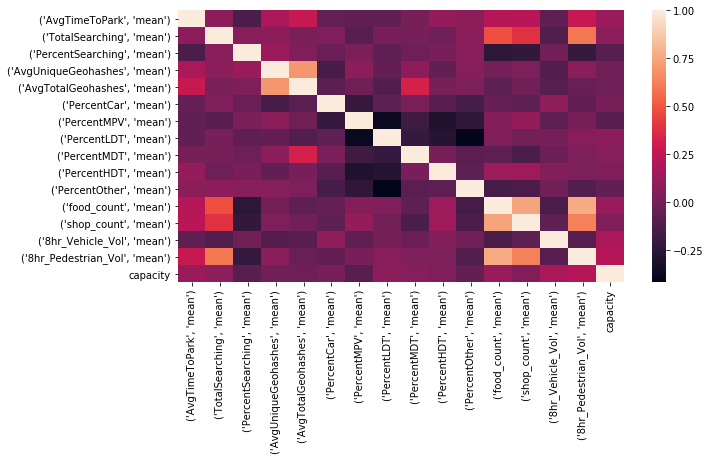

In [244]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

# Random Forest

In [157]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [248]:
data = df_cor.iloc[:, 1:]
pred = df_cor.iloc[:, 0]

In [252]:
feature_list = list(data.columns)
data_ = np.array(data)
pred_ = np.array(pred)
X_train, X_test, y_train, y_test = train_test_split(data_, pred_,test_size = 0.25, random_state = 42)
fit_rf = RandomForestRegressor(n_estimators= 240, random_state=100)
fit_rf.fit(X_train, y_train)
pred_rf = fit_rf.predict(X_test)
pred_train_rf = fit_rf.predict(X_train)
# Performance metrics
print('Metrics for Random Forest Trained on Expanded Data')
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred_rf))
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, pred_train_rf)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, pred_rf)))

Metrics for Random Forest Trained on Expanded Data
Mean squared error: 0.61
The R2 score on the Train set is:	0.932
The R2 score on the Test set is:	0.439


In [253]:
# Get numerical feature importances
importances = list(fit_rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
feature_importances_dat=pd.DataFrame(feature_importances)
feature_importances_dat.columns=['Feature','Importance']
feature_importances_dat

,Feature,Importance
0,"(AvgTotalGeohashes, mean)",0.24
1,"(8hr_Pedestrian_Vol, mean)",0.24
2,"(PercentSearching, mean)",0.07
3,"(AvgUniqueGeohashes, mean)",0.06
4,"(PercentOther, mean)",0.06
5,"(TotalSearching, mean)",0.04
6,"(PercentMPV, mean)",0.04
7,"(PercentLDT, mean)",0.04
8,"(8hr_Vehicle_Vol, mean)",0.04
9,"(PercentMDT, mean)",0.03


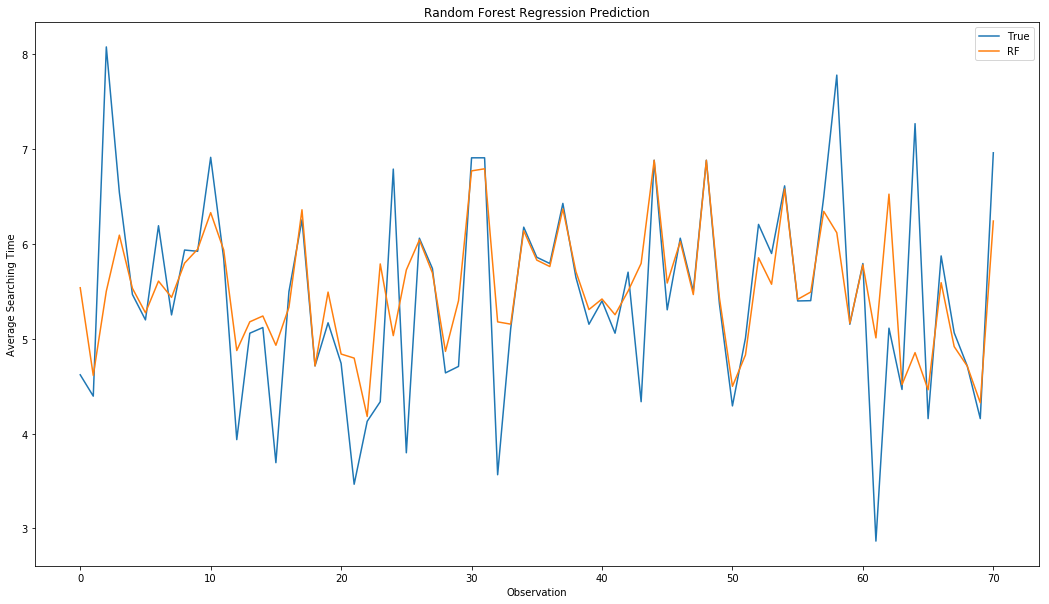

In [254]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(y_test, label='True')
plt.plot(pred_rf, label='RF')
plt.title("Random Forest Regression Prediction")
plt.xlabel('Observation')
plt.ylabel('Average Searching Time')
plt.legend()
plt.show()

# Linear Regression

In [197]:
from sklearn.linear_model import Lasso

In [255]:
regr = Lasso()
regr.fit(X_train, y_train)
pred_lr = regr.predict(X_test)
pred_train_lr = regr.predict(X_train)

In [256]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred_lr))
# Explained variance score: 1 is perfect prediction
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, pred_train_lr)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, pred_lr)))

Coefficients: 
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -7.19345889e-06  8.84223816e-05  3.41065509e-04]
Mean squared error: 1.04
The R2 score on the Train set is:	0.092
The R2 score on the Test set is:	0.045


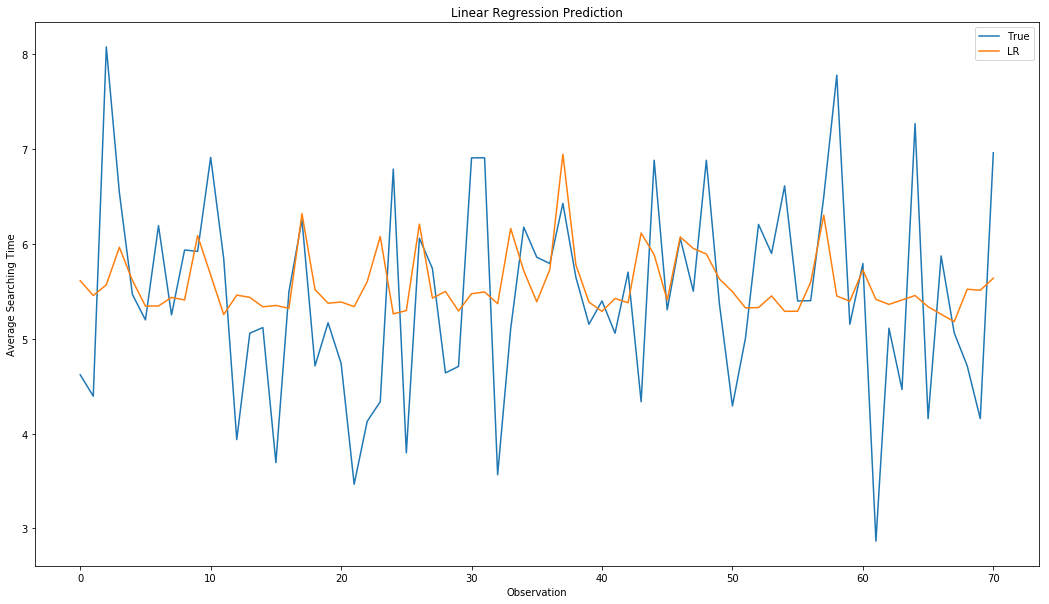

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(y_test, label='True')
plt.plot(pred_lr, label='LR')
plt.title("Linear Regression Prediction")
plt.xlabel('Observation')
plt.ylabel('Average Searching Time')
plt.legend()
plt.show()

# Nerual Network

In [178]:
from keras.callbacks import ModelCheckpoint

In [258]:
model = Sequential()
model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [259]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
211/211 [==============================] - 3s 12ms/step - loss: 13.4151 - acc: 0.0047
Epoch 2/1000
211/211 [==============================] - 0s 493us/step - loss: 5.6803 - acc: 0.0000e+00
Epoch 3/1000
211/211 [==============================] - 0s 436us/step - loss: 4.3636 - acc: 0.0000e+00
Epoch 4/1000
211/211 [==============================] - 0s 436us/step - loss: 3.7821 - acc: 0.0000e+00
Epoch 5/1000
211/211 [==============================] - 0s 417us/step - loss: 3.9332 - acc: 0.0000e+00
Epoch 6/1000
211/211 [==============================] - 0s 436us/step - loss: 3.5563 - acc: 0.0000e+00
Epoch 7/1000
211/211 [==============================] - 0s 417us/step - loss: 3.3959 - acc: 0.0000e+00
Epoch 8/1000
211/211 [==============================] - 0s 398us/step - loss: 3.4924 - acc: 0.0000e+00
Epoch 9/1000
211/211 [==============================] - 0s 531us/step - loss: 3.3532 - acc: 0.0000e+00
Epoch 10/1000
211/211 [==============================] - 0s 493us/step - loss

211/211 [==============================] - 0s 415us/step - loss: 2.5841 - acc: 0.0000e+00
Epoch 80/1000
211/211 [==============================] - ETA: 0s - loss: 2.4535 - acc: 0.0000e+0 - 0s 379us/step - loss: 2.4518 - acc: 0.0000e+00
Epoch 81/1000
211/211 [==============================] - ETA: 0s - loss: 2.4765 - acc: 0.0000e+0 - 0s 417us/step - loss: 2.4916 - acc: 0.0000e+00
Epoch 82/1000
211/211 [==============================] - 0s 398us/step - loss: 2.7447 - acc: 0.0047
Epoch 83/1000
211/211 [==============================] - 0s 455us/step - loss: 2.5880 - acc: 0.0000e+00
Epoch 84/1000
211/211 [==============================] - 0s 473us/step - loss: 2.5571 - acc: 0.0000e+00
Epoch 85/1000
211/211 [==============================] - 0s 436us/step - loss: 2.5564 - acc: 0.0000e+00
Epoch 86/1000
211/211 [==============================] - 0s 493us/step - loss: 2.5439 - acc: 0.0000e+00
Epoch 87/1000
211/211 [==============================] - 0s 436us/step - loss: 2.4966 - acc: 0.0000e+0

211/211 [==============================] - 0s 422us/step - loss: 1.8471 - acc: 0.0000e+00
Epoch 156/1000
211/211 [==============================] - 0s 379us/step - loss: 1.9283 - acc: 0.0000e+00
Epoch 157/1000
211/211 [==============================] - 0s 417us/step - loss: 1.8769 - acc: 0.0000e+00
Epoch 158/1000
211/211 [==============================] - 0s 417us/step - loss: 1.9099 - acc: 0.0000e+00
Epoch 159/1000
211/211 [==============================] - 0s 474us/step - loss: 1.7667 - acc: 0.0000e+00
Epoch 160/1000
211/211 [==============================] - 0s 436us/step - loss: 1.9967 - acc: 0.0000e+00
Epoch 161/1000
211/211 [==============================] - 0s 417us/step - loss: 1.8676 - acc: 0.0000e+00
Epoch 162/1000
211/211 [==============================] - 0s 416us/step - loss: 1.7711 - acc: 0.0000e+00
Epoch 163/1000
211/211 [==============================] - 0s 458us/step - loss: 1.7858 - acc: 0.0000e+00
Epoch 164/1000
211/211 [==============================] - 0s 436us/ste

211/211 [==============================] - 0s 455us/step - loss: 2.1744 - acc: 0.0000e+00
Epoch 233/1000
211/211 [==============================] - 0s 398us/step - loss: 1.4289 - acc: 0.0000e+00
Epoch 234/1000
211/211 [==============================] - 0s 417us/step - loss: 1.3597 - acc: 0.0000e+00
Epoch 235/1000
211/211 [==============================] - ETA: 0s - loss: 1.3306 - acc: 0.0000e+0 - 0s 398us/step - loss: 1.2980 - acc: 0.0000e+00
Epoch 236/1000
211/211 [==============================] - 0s 455us/step - loss: 1.3545 - acc: 0.0000e+00
Epoch 237/1000
211/211 [==============================] - 0s 436us/step - loss: 1.3307 - acc: 0.0000e+00
Epoch 238/1000
211/211 [==============================] - 0s 436us/step - loss: 1.3383 - acc: 0.0000e+00
Epoch 239/1000
211/211 [==============================] - 0s 417us/step - loss: 1.4682 - acc: 0.0000e+00
Epoch 240/1000
211/211 [==============================] - 0s 455us/step - loss: 1.6123 - acc: 0.0000e+00
Epoch 241/1000
211/211 [====

211/211 [==============================] - ETA: 0s - loss: 1.2370 - acc: 0.0000e+0 - 0s 397us/step - loss: 1.2117 - acc: 0.0000e+00
Epoch 310/1000
211/211 [==============================] - 0s 408us/step - loss: 1.2280 - acc: 0.0000e+00
Epoch 311/1000
211/211 [==============================] - 0s 360us/step - loss: 1.0822 - acc: 0.0000e+00
Epoch 312/1000
211/211 [==============================] - 0s 474us/step - loss: 1.1081 - acc: 0.0000e+00
Epoch 313/1000
211/211 [==============================] - 0s 436us/step - loss: 1.3062 - acc: 0.0000e+00
Epoch 314/1000
211/211 [==============================] - 0s 416us/step - loss: 1.0922 - acc: 0.0000e+00
Epoch 315/1000
211/211 [==============================] - 0s 417us/step - loss: 1.1536 - acc: 0.0000e+00
Epoch 316/1000
211/211 [==============================] - 0s 417us/step - loss: 1.0979 - acc: 0.0000e+00
Epoch 317/1000
211/211 [==============================] - 0s 417us/step - loss: 1.1942 - acc: 0.0000e+00
Epoch 318/1000
211/211 [====

211/211 [==============================] - 0s 375us/step - loss: 1.1139 - acc: 0.0000e+00
Epoch 386/1000
211/211 [==============================] - 0s 455us/step - loss: 1.3592 - acc: 0.0000e+00
Epoch 387/1000
211/211 [==============================] - 0s 379us/step - loss: 1.1454 - acc: 0.0000e+00
Epoch 388/1000
211/211 [==============================] - 0s 493us/step - loss: 1.0245 - acc: 0.0000e+00
Epoch 389/1000
211/211 [==============================] - 0s 455us/step - loss: 1.0907 - acc: 0.0000e+00
Epoch 390/1000
211/211 [==============================] - 0s 436us/step - loss: 1.5612 - acc: 0.0000e+00
Epoch 391/1000
211/211 [==============================] - 0s 436us/step - loss: 1.1103 - acc: 0.0000e+00
Epoch 392/1000
211/211 [==============================] - 0s 455us/step - loss: 1.1804 - acc: 0.0000e+00
Epoch 393/1000
211/211 [==============================] - 0s 455us/step - loss: 1.0980 - acc: 0.0000e+00
Epoch 394/1000
211/211 [==============================] - 0s 455us/ste

211/211 [==============================] - 0s 436us/step - loss: 1.0680 - acc: 0.0000e+00
Epoch 463/1000
211/211 [==============================] - 0s 405us/step - loss: 0.9531 - acc: 0.0000e+00
Epoch 464/1000
211/211 [==============================] - 0s 367us/step - loss: 1.2854 - acc: 0.0000e+00
Epoch 465/1000
211/211 [==============================] - 0s 436us/step - loss: 1.2821 - acc: 0.0000e+00
Epoch 466/1000
211/211 [==============================] - 0s 436us/step - loss: 1.0866 - acc: 0.0000e+00
Epoch 467/1000
211/211 [==============================] - 0s 417us/step - loss: 1.1187 - acc: 0.0000e+00
Epoch 468/1000
211/211 [==============================] - 0s 474us/step - loss: 0.9872 - acc: 0.0000e+00
Epoch 469/1000
211/211 [==============================] - 0s 474us/step - loss: 0.9881 - acc: 0.0000e+00
Epoch 470/1000
211/211 [==============================] - 0s 417us/step - loss: 0.9994 - acc: 0.0000e+00
Epoch 471/1000
211/211 [==============================] - 0s 417us/ste

211/211 [==============================] - 0s 436us/step - loss: 0.9141 - acc: 0.0000e+00
Epoch 540/1000
211/211 [==============================] - 0s 398us/step - loss: 1.2400 - acc: 0.0000e+00
Epoch 541/1000
211/211 [==============================] - 0s 417us/step - loss: 1.1043 - acc: 0.0000e+00
Epoch 542/1000
211/211 [==============================] - 0s 436us/step - loss: 0.9949 - acc: 0.0000e+00
Epoch 543/1000
211/211 [==============================] - 0s 455us/step - loss: 0.9160 - acc: 0.0000e+00
Epoch 544/1000
211/211 [==============================] - 0s 436us/step - loss: 0.8976 - acc: 0.0000e+00
Epoch 545/1000
211/211 [==============================] - 0s 436us/step - loss: 0.9470 - acc: 0.0000e+00
Epoch 546/1000
211/211 [==============================] - 0s 436us/step - loss: 0.9571 - acc: 0.0000e+00
Epoch 547/1000
211/211 [==============================] - 0s 474us/step - loss: 0.9083 - acc: 0.0000e+00
Epoch 548/1000
211/211 [==============================] - 0s 664us/ste

211/211 [==============================] - 0s 427us/step - loss: 0.8609 - acc: 0.0000e+00
Epoch 618/1000
211/211 [==============================] - 0s 413us/step - loss: 0.8928 - acc: 0.0000e+00
Epoch 619/1000
211/211 [==============================] - 0s 436us/step - loss: 1.0143 - acc: 0.0000e+00
Epoch 620/1000
211/211 [==============================] - 0s 567us/step - loss: 0.9499 - acc: 0.0000e+00
Epoch 621/1000
211/211 [==============================] - 0s 424us/step - loss: 0.9479 - acc: 0.0000e+00
Epoch 622/1000
211/211 [==============================] - 0s 427us/step - loss: 1.0541 - acc: 0.0000e+00
Epoch 623/1000
211/211 [==============================] - 0s 410us/step - loss: 0.8967 - acc: 0.0000e+00
Epoch 624/1000
211/211 [==============================] - 0s 436us/step - loss: 0.8715 - acc: 0.0000e+00
Epoch 625/1000
211/211 [==============================] - 0s 416us/step - loss: 0.9570 - acc: 0.0000e+00
Epoch 626/1000
211/211 [==============================] - 0s 420us/ste

211/211 [==============================] - 0s 489us/step - loss: 1.3452 - acc: 0.0000e+00
Epoch 695/1000
211/211 [==============================] - 0s 505us/step - loss: 1.0088 - acc: 0.0000e+00
Epoch 696/1000
211/211 [==============================] - 0s 470us/step - loss: 0.9076 - acc: 0.0000e+00
Epoch 697/1000
211/211 [==============================] - 0s 489us/step - loss: 0.9013 - acc: 0.0000e+00 0s - loss: 1.0013 - acc: 0.0000e+0
Epoch 698/1000
211/211 [==============================] - 0s 519us/step - loss: 1.0407 - acc: 0.0000e+00
Epoch 699/1000
211/211 [==============================] - 0s 505us/step - loss: 0.9732 - acc: 0.0000e+00
Epoch 700/1000
211/211 [==============================] - 0s 498us/step - loss: 0.8521 - acc: 0.0000e+00
Epoch 701/1000
211/211 [==============================] - 0s 510us/step - loss: 0.9473 - acc: 0.0000e+00
Epoch 702/1000
211/211 [==============================] - 0s 408us/step - loss: 0.8957 - acc: 0.0000e+00
Epoch 703/1000
211/211 [===========

211/211 [==============================] - 0s 378us/step - loss: 0.9282 - acc: 0.0000e+00
Epoch 771/1000
211/211 [==============================] - 0s 420us/step - loss: 0.9250 - acc: 0.0000e+00
Epoch 772/1000
211/211 [==============================] - 0s 397us/step - loss: 0.9366 - acc: 0.0000e+00
Epoch 773/1000
211/211 [==============================] - ETA: 0s - loss: 0.9018 - acc: 0.0000e+0 - 0s 439us/step - loss: 0.9225 - acc: 0.0000e+00
Epoch 774/1000
211/211 [==============================] - 0s 379us/step - loss: 0.9465 - acc: 0.0000e+00
Epoch 775/1000
211/211 [==============================] - 0s 474us/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 776/1000
211/211 [==============================] - 0s 436us/step - loss: 0.8798 - acc: 0.0000e+00
Epoch 777/1000
211/211 [==============================] - 0s 417us/step - loss: 0.8592 - acc: 0.0000e+00
Epoch 778/1000
211/211 [==============================] - 0s 454us/step - loss: 0.9367 - acc: 0.0000e+00
Epoch 779/1000
211/211 [====

211/211 [==============================] - ETA: 0s - loss: 1.0727 - acc: 0.0000e+0 - 0s 451us/step - loss: 0.9562 - acc: 0.0000e+00
Epoch 848/1000
211/211 [==============================] - 0s 363us/step - loss: 0.8918 - acc: 0.0000e+00
Epoch 849/1000
211/211 [==============================] - 0s 474us/step - loss: 1.0098 - acc: 0.0000e+00
Epoch 850/1000
211/211 [==============================] - 0s 446us/step - loss: 0.9373 - acc: 0.0000e+00
Epoch 851/1000
211/211 [==============================] - 0s 407us/step - loss: 0.8820 - acc: 0.0000e+00
Epoch 852/1000
211/211 [==============================] - 0s 455us/step - loss: 1.0895 - acc: 0.0000e+00
Epoch 853/1000
211/211 [==============================] - 0s 455us/step - loss: 0.9489 - acc: 0.0000e+00
Epoch 854/1000
211/211 [==============================] - 0s 436us/step - loss: 0.8952 - acc: 0.0000e+00
Epoch 855/1000
211/211 [==============================] - 0s 417us/step - loss: 0.9338 - acc: 0.0000e+00
Epoch 856/1000
211/211 [====

211/211 [==============================] - 0s 417us/step - loss: 0.9477 - acc: 0.0000e+00
Epoch 925/1000
211/211 [==============================] - 0s 417us/step - loss: 1.0224 - acc: 0.0000e+00 0s - loss: 0.9811 - acc: 0.0000e+0
Epoch 926/1000
211/211 [==============================] - 0s 436us/step - loss: 0.8440 - acc: 0.0000e+00
Epoch 927/1000
211/211 [==============================] - 0s 436us/step - loss: 0.8631 - acc: 0.0000e+00
Epoch 928/1000
211/211 [==============================] - 0s 450us/step - loss: 0.8840 - acc: 0.0000e+00
Epoch 929/1000
211/211 [==============================] - 0s 450us/step - loss: 0.8660 - acc: 0.0000e+00
Epoch 930/1000
211/211 [==============================] - 0s 474us/step - loss: 0.8661 - acc: 0.0000e+00
Epoch 931/1000
211/211 [==============================] - 0s 432us/step - loss: 0.8078 - acc: 0.0000e+00
Epoch 932/1000
211/211 [==============================] - 0s 446us/step - loss: 0.8625 - acc: 0.0000e+00
Epoch 933/1000
211/211 [===========

In [260]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [261]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred_test))
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, pred_train)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, pred_test)))

Mean squared error: 0.93
The R2 score on the Train set is:	0.216
The R2 score on the Test set is:	0.148


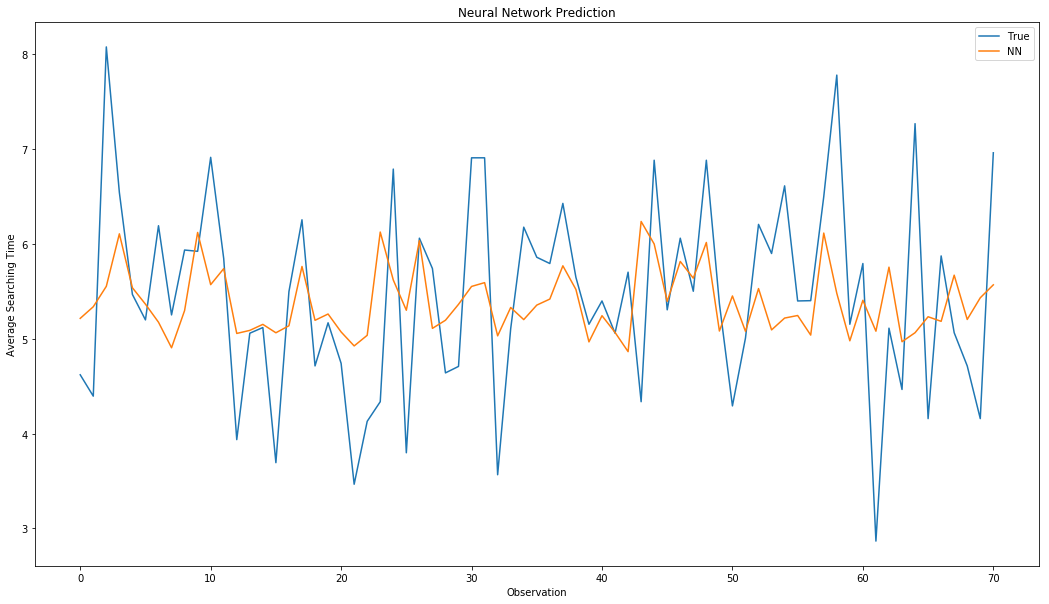

In [262]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(y_test, label='True')
plt.plot(pred_test, label='NN')
plt.title("Neural Network Prediction")
plt.xlabel('Observation')
plt.ylabel('Average Searching Time')
plt.legend()
plt.show()

# XGBoost Model

In [191]:
from xgboost import XGBRegressor

In [263]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)
pred_xgb = XGBModel.predict(X_test)
pred_train_xgb = XGBModel.predict(X_train)

In [264]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred_xgb))
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, pred_train_xgb)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, pred_xgb)))

Mean squared error: 0.75
The R2 score on the Train set is:	0.922
The R2 score on the Test set is:	0.314


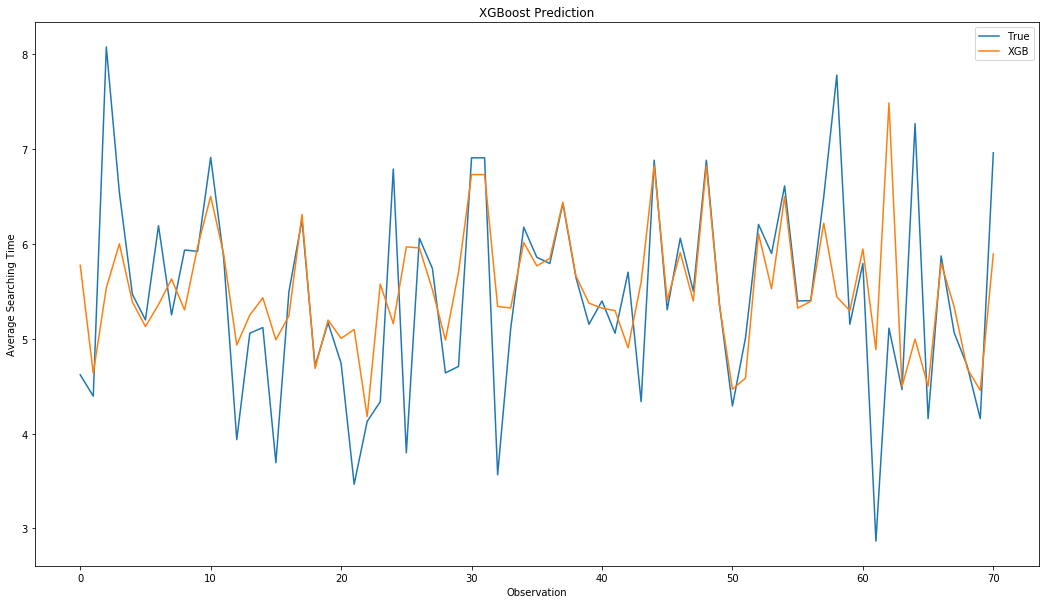

In [265]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(y_test, label='True')
plt.plot(pred_xgb, label='XGB')
plt.title("XGBoost Prediction")
plt.xlabel('Observation')
plt.ylabel('Average Searching Time')
plt.legend()
plt.show()